In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV0/'
TrainModelName = 'S54bin2.npz'
ValidationModelName = 'S54bin2Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORnetbin2d29V0.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='ORnetbin2d29V0.h5', batch_size=100, box_vector=4, categories=4, depth=29, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=5, residual=True, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
loading weights
(36076, 1, 1, 24) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 55s 2ms/step - loss: 2.8398 - acc: 0.3042 - val_loss: 2.8116 - val_acc: 0.3633

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 2.8115843767364, 'val_acc': 0.3633491322829762, 'loss': 2.839800733303413, 'acc': 0.30424659123989334, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

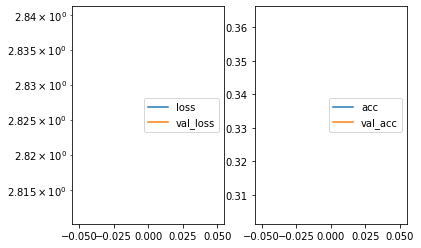

Normal Probability: [[0.00134675]]


NameError: name 'TrueLabel' is not defined

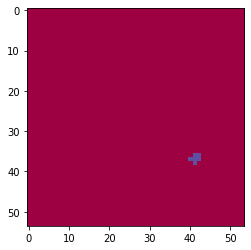

In [5]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
